In [1]:
import pandas as pd
import sklearn
import joblib
import matplotlib.pyplot as plt


In [2]:
pd.set_option("display.max_columns",None)

In [3]:
sklearn.set_config(transform_output='default')

In [4]:
train_df=pd.read_csv('data/train.csv')
val_df=pd.read_csv('data/val.csv')
test_df=pd.read_csv('data/test.csv')

In [5]:
train_df

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,10:20:00,11:50:00,90,0.0,In-flight meal not included,4995
1,Air India,2019-05-18,Delhi,Cochin,09:00:00,07:40:00,1360,1.0,No Info,8372
2,Air India,2019-06-12,Kolkata,Banglore,09:10:00,11:05:00,1555,2.0,No Info,6117
3,Vistara,2019-04-01,Kolkata,Banglore,20:20:00,22:55:00,1595,1.0,No Info,7770
4,Vistara,2019-06-06,Kolkata,Banglore,17:00:00,10:45:00,1065,1.0,No Info,9187
...,...,...,...,...,...,...,...,...,...,...
635,Air Asia,2019-04-12,Banglore,Delhi,04:55:00,07:45:00,170,0.0,No Info,4282
636,Jet Airways,2019-05-09,Kolkata,Banglore,09:35:00,21:05:00,690,1.0,No Info,13067
637,Indigo,2019-05-15,Banglore,Delhi,06:05:00,08:50:00,165,0.0,No Info,4423
638,Multiple Carriers,2019-05-15,Delhi,Cochin,08:45:00,21:00:00,735,1.0,No Info,7670


In [6]:
## splitting the data into x and y 

def split_data(data):
    x=data.drop(columns='price')
    y=data.price.copy()
    return (x,y)

In [7]:
x_train,y_train=split_data(train_df)

In [8]:
x_train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,10:20:00,11:50:00,90,0.0,In-flight meal not included
1,Air India,2019-05-18,Delhi,Cochin,09:00:00,07:40:00,1360,1.0,No Info
2,Air India,2019-06-12,Kolkata,Banglore,09:10:00,11:05:00,1555,2.0,No Info
3,Vistara,2019-04-01,Kolkata,Banglore,20:20:00,22:55:00,1595,1.0,No Info
4,Vistara,2019-06-06,Kolkata,Banglore,17:00:00,10:45:00,1065,1.0,No Info
...,...,...,...,...,...,...,...,...,...
635,Air Asia,2019-04-12,Banglore,Delhi,04:55:00,07:45:00,170,0.0,No Info
636,Jet Airways,2019-05-09,Kolkata,Banglore,09:35:00,21:05:00,690,1.0,No Info
637,Indigo,2019-05-15,Banglore,Delhi,06:05:00,08:50:00,165,0.0,No Info
638,Multiple Carriers,2019-05-15,Delhi,Cochin,08:45:00,21:00:00,735,1.0,No Info


In [9]:
y_train

0       4995
1       8372
2       6117
3       7770
4       9187
       ...  
635     4282
636    13067
637     4423
638     7670
639    10844
Name: price, Length: 640, dtype: int64

In [10]:
x_val,y_val=split_data(val_df)
print(x_val.shape,y_val.shape)

(160, 9) (160,)


In [11]:
x_test,y_test=split_data(test_df)

In [12]:
print(x_test.shape,y_test.shape)

(200, 9) (200,)


In [13]:
### meta info

x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          640 non-null    object 
 1   date_of_journey  640 non-null    object 
 2   source           640 non-null    object 
 3   destination      640 non-null    object 
 4   dep_time         640 non-null    object 
 5   arrival_time     640 non-null    object 
 6   duration         640 non-null    int64  
 7   total_stops      640 non-null    float64
 8   additional_info  640 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 45.1+ KB


In [14]:
## data preprocessing
dt_cols=['date_of_journey','dep_time','arrival_time']
num_cols=['duration','total_stops']

cat_cols=[col for col in x_train.columns if (col not in dt_cols) and (col not in num_cols)]

In [15]:
cat_cols

['airline', 'source', 'destination', 'additional_info']

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [17]:
!pip install feature_engine
from feature_engine.datetime import DatetimeFeatures

In [18]:
from feature_engine.datetime import DatetimeFeatures

In [19]:
num_transformer=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
)

cat_transformer=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('encoder',OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
    ]
)

doj_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('extractor',DatetimeFeatures(features_to_extract=['month','week','day_of_week','day_of_month'],format='mixed')),
    ('scalar',StandardScaler())
])

time_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('extractor',DatetimeFeatures(features_to_extract=['hour','minute'],format='mixed')),
    ('scalar',StandardScaler())
])


In [20]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',num_transformer,num_cols),
        ('cat',cat_transformer,cat_cols),
        ('doj',doj_transformer,['date_of_journey']),
        ('time',time_transformer,['dep_time','arrival_time'])
    ]
)

In [21]:
preprocessor.fit_transform(x_train)

array([[-1.09591823, -1.21213152,  0.        , ..., -0.14005709,
        -0.34523131,  1.49385907],
       [ 1.43569944,  0.31797533,  0.        , ..., -1.22986299,
        -0.93560684,  0.89104078],
       [ 1.82441239,  1.84808218,  0.        , ..., -0.68496004,
        -0.34523131, -1.21882323],
       ...,
       [-0.94641325, -1.21213152,  0.        , ..., -0.95741152,
        -0.78801296,  1.49385907],
       [ 0.18982461,  0.31797533,  0.        , ...,  1.22220029,
         1.1307075 , -1.52023237],
       [ 0.63833955,  0.31797533,  0.        , ..., -1.22986299,
        -0.19763743, -1.52023237]])

In [22]:
data=pd.concat([train_df,val_df],axis=0)
x_data,y_data=split_data(data)

In [23]:
x_data.shape,y_data.shape

((800, 9), (800,))

In [24]:
## model selection 

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [25]:
!pip install xgboost

In [26]:
algorithms={
    'linear regression':LinearRegression(),
    'support vector machine':SVR(),
    'random forest regressor':RandomForestRegressor(n_estimators=10),
    'xg boost':XGBRegressor(n_estimators=10)
}

In [27]:
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve

In [28]:
def plot_curves(sizes,mean_scores,std_scores,label,ax):
    ax.plot(sizes,mean_scores,marker='o',label=label)
    ax.fill_between(x=sizes,y1=mean_scores-std_scores,y2=mean_scores+std_scores,alpha=0.5)
    

In [29]:
def plot_learning_curves(name, algorithm, figsize=(12, 4)):
	model = Pipeline(steps=[
		("pre", preprocessor),
		("alg", algorithm)
	])

	train_sizes, train_scores, test_scores = learning_curve(
		estimator=model,
		X=x_data,
		y=y_data,
		cv=3,
		scoring="r2",
		n_jobs=-1,
		random_state=42
	)
	
	mean_train_scores = np.mean(train_scores, axis=1)
	std_train_scores = np.std(train_scores, axis=1)
	train_score = f"{mean_train_scores[-1]:.2f} +/- {std_train_scores[-1]:.2f}"

	mean_test_scores = np.mean(test_scores, axis=1)
	std_test_scores = np.std(test_scores, axis=1)
	test_score = f"{mean_test_scores[-1]:.2f} +/- {std_test_scores[-1]:.2f}"

	fig, ax = plt.subplots(figsize=figsize)

	# training curve
	plot_curves(
		train_sizes,
		mean_train_scores,
		std_train_scores,
		f"Train ({train_score})",
		ax
	)

	# test curve
	plot_curves(
		train_sizes,
		mean_test_scores,
		std_test_scores,
		f"Test ({test_score})",
		ax
	)

	ax.set(xlabel="Training Set Size", ylabel="R-square", title=name)

	ax.legend(loc="lower right")

	plt.show()


In [30]:
import numpy as np

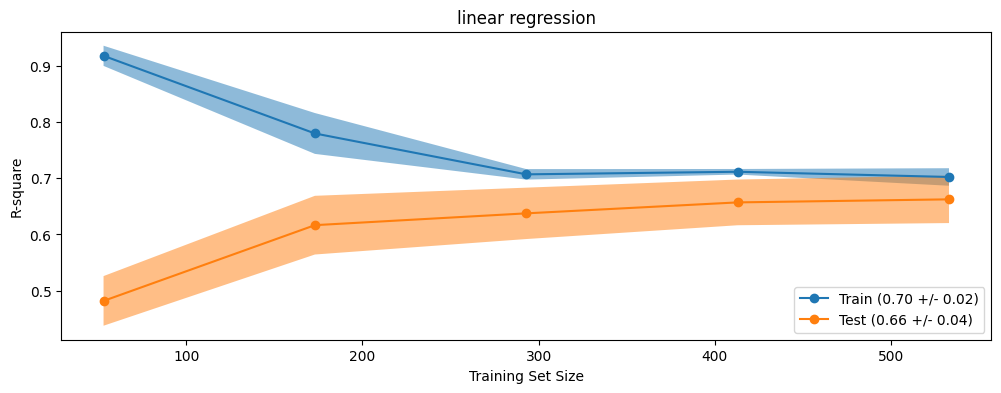

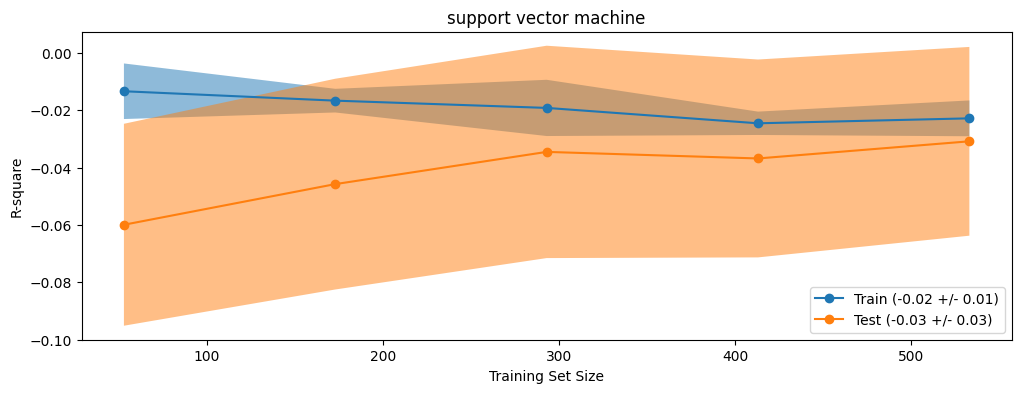

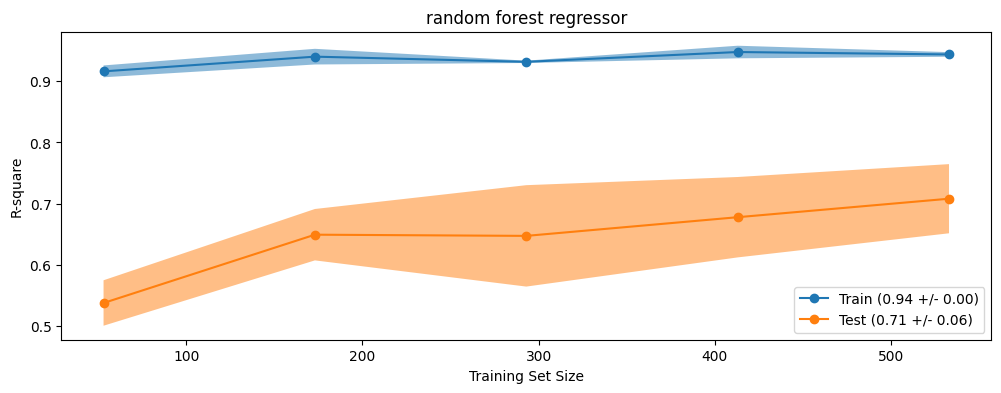

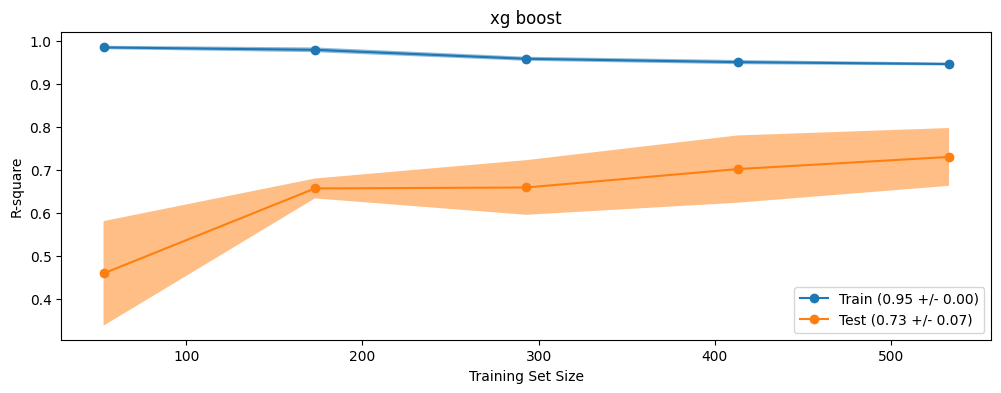

In [31]:
for name,alg in algorithms.items():
    plot_learning_curves(name,alg)

In [32]:
model=Pipeline(steps=[
    ('pre',preprocessor),
    ('rf',RandomForestRegressor(n_estimators=10))
])

In [33]:
model.fit(x_data,y_data)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'total_stops']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['airline', 'source',
                                                   '...
                                                                                                         'day_of_month'],
                                                                                    format='mixed')),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  ['date_of_journey']),
                                                 ('time',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('extractor',
                                                                   DatetimeFeatures(features_to_extract=['hour',
                                                                                                         'minute'],
                                                                                    format='mixed')),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  ['dep_time',
                                                   'arrival_time'])])),
                ('rf', RandomForestRegressor(n_estimators=10))])

In [34]:
## model evaluation 
def evaluate_model(x,y):
    y_pred=model.predict(x)
    return r2_score(y,y_pred)
                   

In [35]:
print(f'r2 score on training data is ={evaluate_model(x_data,y_data)}')

r2 score on training data is =0.9610359447369315


In [36]:
print(f'r2 score on test data is ={evaluate_model(x_test,y_test)}')

r2 score on test data is =0.6659417313930545


In [37]:
## model saving 
joblib.dump(model,'model.joblib')

['model.joblib']

In [38]:
saved_model=joblib.load('model.joblib')

In [39]:
y_pred=saved_model.predict(x_test)
r2_score(y_test,y_pred)

0.6659417313930545